# 3D analysis

This tutorial shows how to run a 3D map-based analysis (two spatial and one energy axis).

The example data is three observations of the Galactic center region with CTA.

Warning: this is work in progress, several missing pieces: background, PSF, diffuse and point source models, model serialisation.

We aim to have a first usable version ready and documented here for the Gammapy v0.8 release on May 7, 208.

## Imports and versions

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import numpy as np
from numpy.testing import assert_allclose
import astropy.units as u
from gammapy.extern.pathlib import Path
from gammapy.data import DataStore
from gammapy.maps import WcsGeom, MapAxis
from gammapy.cube import MapMaker

In [3]:
!gammapy info --no-envvar --no-dependencies --no-system


Gammapy package:

	path                   : /Users/deil/code/gammapy/gammapy 
	version                : 0.8.dev5837 
	githash                : bd020db9f07a4edb4ecea2194b58e8c6cbae6467 



## Setup

In [4]:
# Define which data to use
data_store = DataStore.from_dir(
    '$GAMMAPY_EXTRA/datasets/cta-1dc/index/gps/'
)
obs_ids = [110380, 111140, 111159]
# obs_ids = [110380]

In [5]:
# Define map geometry (spatial and energy binning)
axis = MapAxis.from_edges(
    np.logspace(-1., 1., 10), unit='TeV',
)
geom = WcsGeom.create(
    skydir=(0, 0), binsz=0.02, width=(20, 15),
    coordsys='GAL', proj='CAR',
    axes=[axis],
)

In [6]:
# We will write some files; let's put them in this path
out_path = Path('analysis_3d')
out_path.mkdir(exist_ok=True)

## Make maps

In [7]:
%%time
maker = MapMaker(geom, 4. * u.deg)

for obs_id in obs_ids:
    print('processing:', obs_id)
    obs = data_store.obs(obs_id)
    maker.process_obs(obs)

processing: 110380


/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


processing: 111140
processing: 111159
CPU times: user 10.5 s, sys: 2.53 s, total: 13 s
Wall time: 13.1 s


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x10c8bc240>)

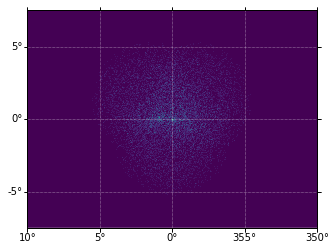

In [8]:
count_map_2d = maker.count_map.sum_over_axes()
count_map_2d.plot()

In [9]:
maker.count_map.write(str(out_path / 'counts.fits'))
maker.background_map.write(str(out_path / 'background.fits'))
maker.exposure_map.write(str(out_path / 'exposure.fits'))

## Compute PSF kernel

TODO

## Model fit

TODO: add model fit or other kind of analysis here.
For now, see the `simulate_3d` notebook.